# Time-Series Anomaly Detection Using TimeGPT

Preprocessed Dataset Preview:
          ds       y
0 2007-01-01  0.7537
1 2007-01-02  0.7537
2 2007-01-03  0.7559
3 2007-01-04  0.7631
4 2007-01-05  0.7644

Visualizing the Preprocessed Time Series Data

Performing Anomaly Detection...
Anomalies Detected:
          ds       y   TimeGPT  TimeGPT-hi-99  TimeGPT-lo-99  anomaly
0 2007-02-03  0.7700  0.769721       0.789251       0.750191    False
1 2007-02-04  0.7719  0.770056       0.789586       0.750526    False
2 2007-02-05  0.7738  0.769897       0.789427       0.750367    False
3 2007-02-06  0.7720  0.769304       0.788834       0.749774    False
4 2007-02-07  0.7701  0.769377       0.788907       0.749847    False

Visualizing Detected Anomalies


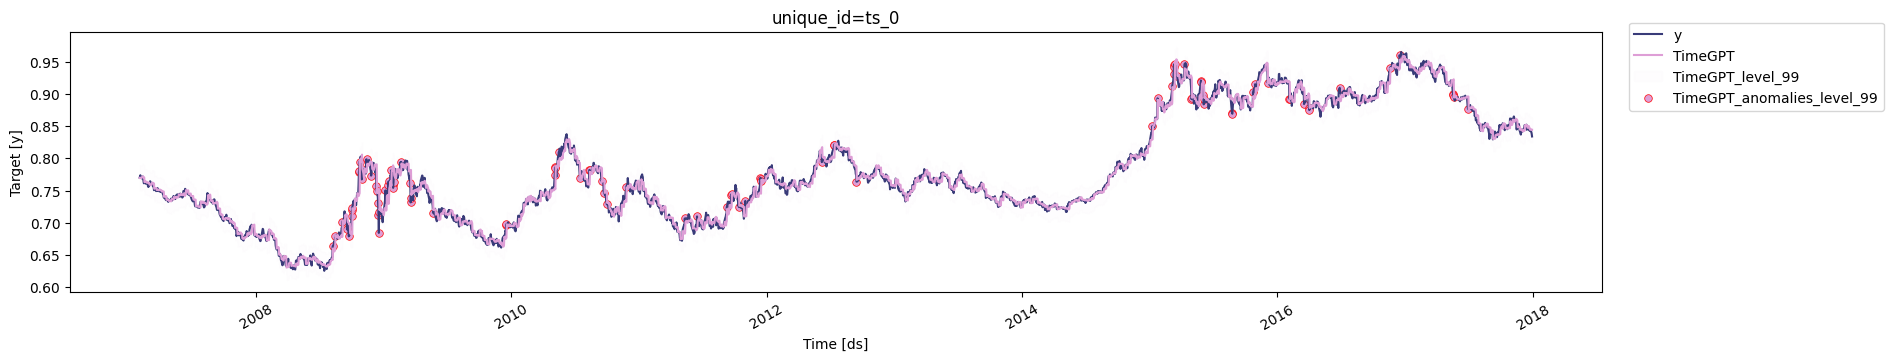

In [2]:
# Install the required library for TimeGPT functionality
!pip install -Uqq nixtla

# Import necessary libraries
import pandas as pd
from datetime import datetime
from nixtla import NixtlaClient
from google.colab import userdata

# Initialize the Nixtla client with your API key
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')  # Replace with your API key if not in Colab
nixtla_client = NixtlaClient(api_key=NIXTLA_API_KEY)

# Load the dataset
data_url = 'https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/refs/heads/main/datasets/usdeur.csv'
df = pd.read_csv(data_url)

# Convert timestamp column to readable date format
def convert_date_to_readable_format(timestamp_col):
    """Convert Unix timestamps (in milliseconds) to human-readable date format."""
    return timestamp_col.apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d') if pd.notnull(x) else x)

# Ensure the 'timestamp' column is properly formatted
df['timestamp'] = convert_date_to_readable_format(df['timestamp'])

# Rename columns to match the expected format by TimeGPT
df.rename(columns={'timestamp': 'ds', 'value': 'y'}, inplace=True)

# Preprocess the data to ensure consistent timestamps
# Set the date column as the index and fill missing timestamps
df['ds'] = pd.to_datetime(df['ds'])  # Convert 'ds' column to datetime
df = df.set_index('ds').asfreq('D')  # Ensure daily frequency, filling missing dates
df['y'] = df['y'].interpolate(method='linear')  # Fill missing values in 'y' by interpolation

# Reset the index for TimeGPT compatibility
df = df.reset_index()

# Display the first few rows after preprocessing
print("Preprocessed Dataset Preview:")
print(df.head())

# Plot the original dataset to visualize the time series
print("\nVisualizing the Preprocessed Time Series Data")
nixtla_client.plot(df, max_insample_length=365)

# Perform anomaly detection on the preprocessed time series
print("\nPerforming Anomaly Detection...")
anomalies_df = nixtla_client.detect_anomalies(df, freq='D')

# Display detected anomalies
print("Anomalies Detected:")
print(anomalies_df.head())

# Plot the anomalies on the time series
print("\nVisualizing Detected Anomalies")
nixtla_client.plot(df, anomalies_df)


Finally, we visualized the detected anomalies:

The graph plots the original time series (y), the predicted values (TimeGPT), and the confidence intervals (TimeGPT-hi-99 and TimeGPT-lo-99).
Points flagged as anomalies are shown with red markers, indicating significant deviations from expected values.
In this particular dataset, there are very few anomalous points, highlighting the overall stability of the data

The anomaly detection process successfully evaluated the time series for deviations. This approach can be extended to monitor real-world systems, such as financial markets or sensor data, to identify unusual behaviors and take corrective actions.